In [1]:

# ✅ Install required libraries (only run once in Jupyter)
!pip install tensorflow numpy matplotlib


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


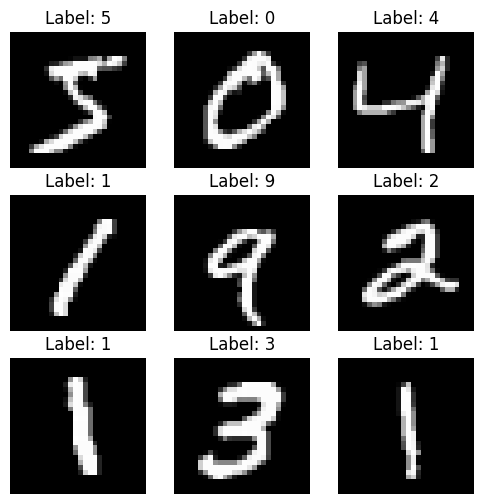

In [3]:

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Show some images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


In [4]:

# Reshape to [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")

# Normalize pixel values (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [5]:

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


c:\Users\tadie\anaconda3\envs\py311_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=128,
    verbose=2
)


Epoch 1/10
469/469 - 34s - 72ms/step - accuracy: 0.8845 - loss: 0.3677 - val_accuracy: 0.9781 - val_loss: 0.0724
Epoch 2/10
469/469 - 33s - 70ms/step - accuracy: 0.9636 - loss: 0.1230 - val_accuracy: 0.9856 - val_loss: 0.0455
Epoch 3/10
469/469 - 32s - 68ms/step - accuracy: 0.9717 - loss: 0.0910 - val_accuracy: 0.9882 - val_loss: 0.0370
Epoch 4/10
469/469 - 27s - 58ms/step - accuracy: 0.9771 - loss: 0.0744 - val_accuracy: 0.9900 - val_loss: 0.0290
Epoch 5/10
469/469 - 32s - 69ms/step - accuracy: 0.9800 - loss: 0.0656 - val_accuracy: 0.9903 - val_loss: 0.0281
Epoch 6/10
469/469 - 34s - 73ms/step - accuracy: 0.9822 - loss: 0.0605 - val_accuracy: 0.9918 - val_loss: 0.0267
Epoch 7/10
469/469 - 41s - 88ms/step - accuracy: 0.9830 - loss: 0.0546 - val_accuracy: 0.9916 - val_loss: 0.0251
Epoch 8/10
469/469 - 31s - 67ms/step - accuracy: 0.9844 - loss: 0.0514 - val_accuracy: 0.9922 - val_loss: 0.0237
Epoch 9/10
469/469 - 30s - 64ms/step - accuracy: 0.9858 - loss: 0.0476 - val_accuracy: 0.9928 - 

In [7]:

score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]*100:.2f}%")


Test Loss: 0.0211
Test Accuracy: 99.32%


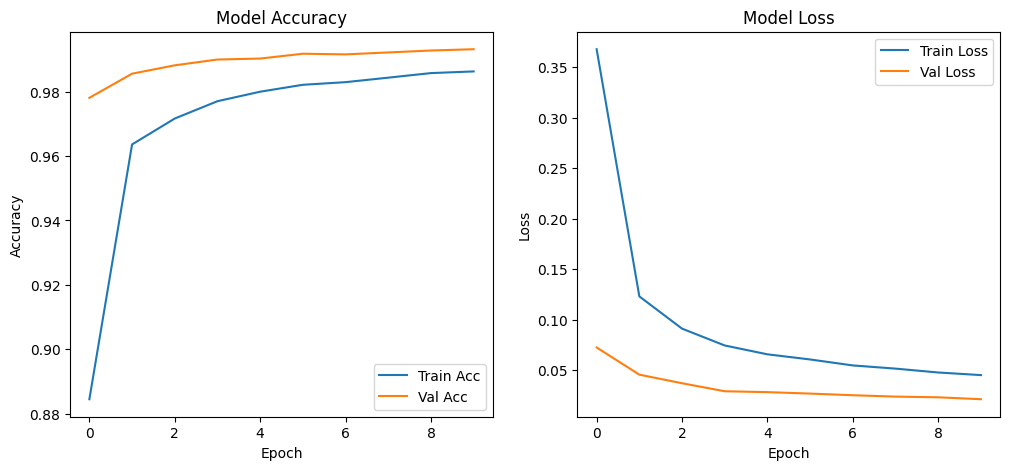

In [8]:

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()
